In [3]:
from helper_functions import read_net
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import algorithms
from cdlib.classes import NodeClustering

In [41]:
G = read_net(os.path.join("..", "data"), "wikilinks_ids")

In [155]:
def sampled_network(G):
    # Peform random walk until 10% of nodes are included
    thres = G.number_of_nodes() * 0.0015

    # Randomly selected starting node
    current_node = random.choice(list(G.nodes()))

    G_sampled = nx.Graph()
    G_sampled.add_node(current_node)
    while G_sampled.number_of_nodes() < thres:

        # Add connection to all existing nodes in G_sampled
        neighbours = list(G.neighbors(current_node))
        for n in neighbours:
            if n in list(G_sampled.nodes()):
                G_sampled.add_edge(current_node, n)

        # Randomly select current nodes neighour
        while True:
            next_node = random.choice(neighbours)
            if len(list(G.neighbors(next_node))) != 0:
                break
        
        # Add new node to the graph and add link between them
        G_sampled.add_node(next_node)
        G_sampled.add_edge(current_node, next_node)

        # Update current node
        current_node = next_node
        
    return G_sampled

In [170]:
G_sampled = sampled_network(G)

In [171]:
G_sampled.remove_edges_from(list(nx.selfloop_edges(G_sampled)))

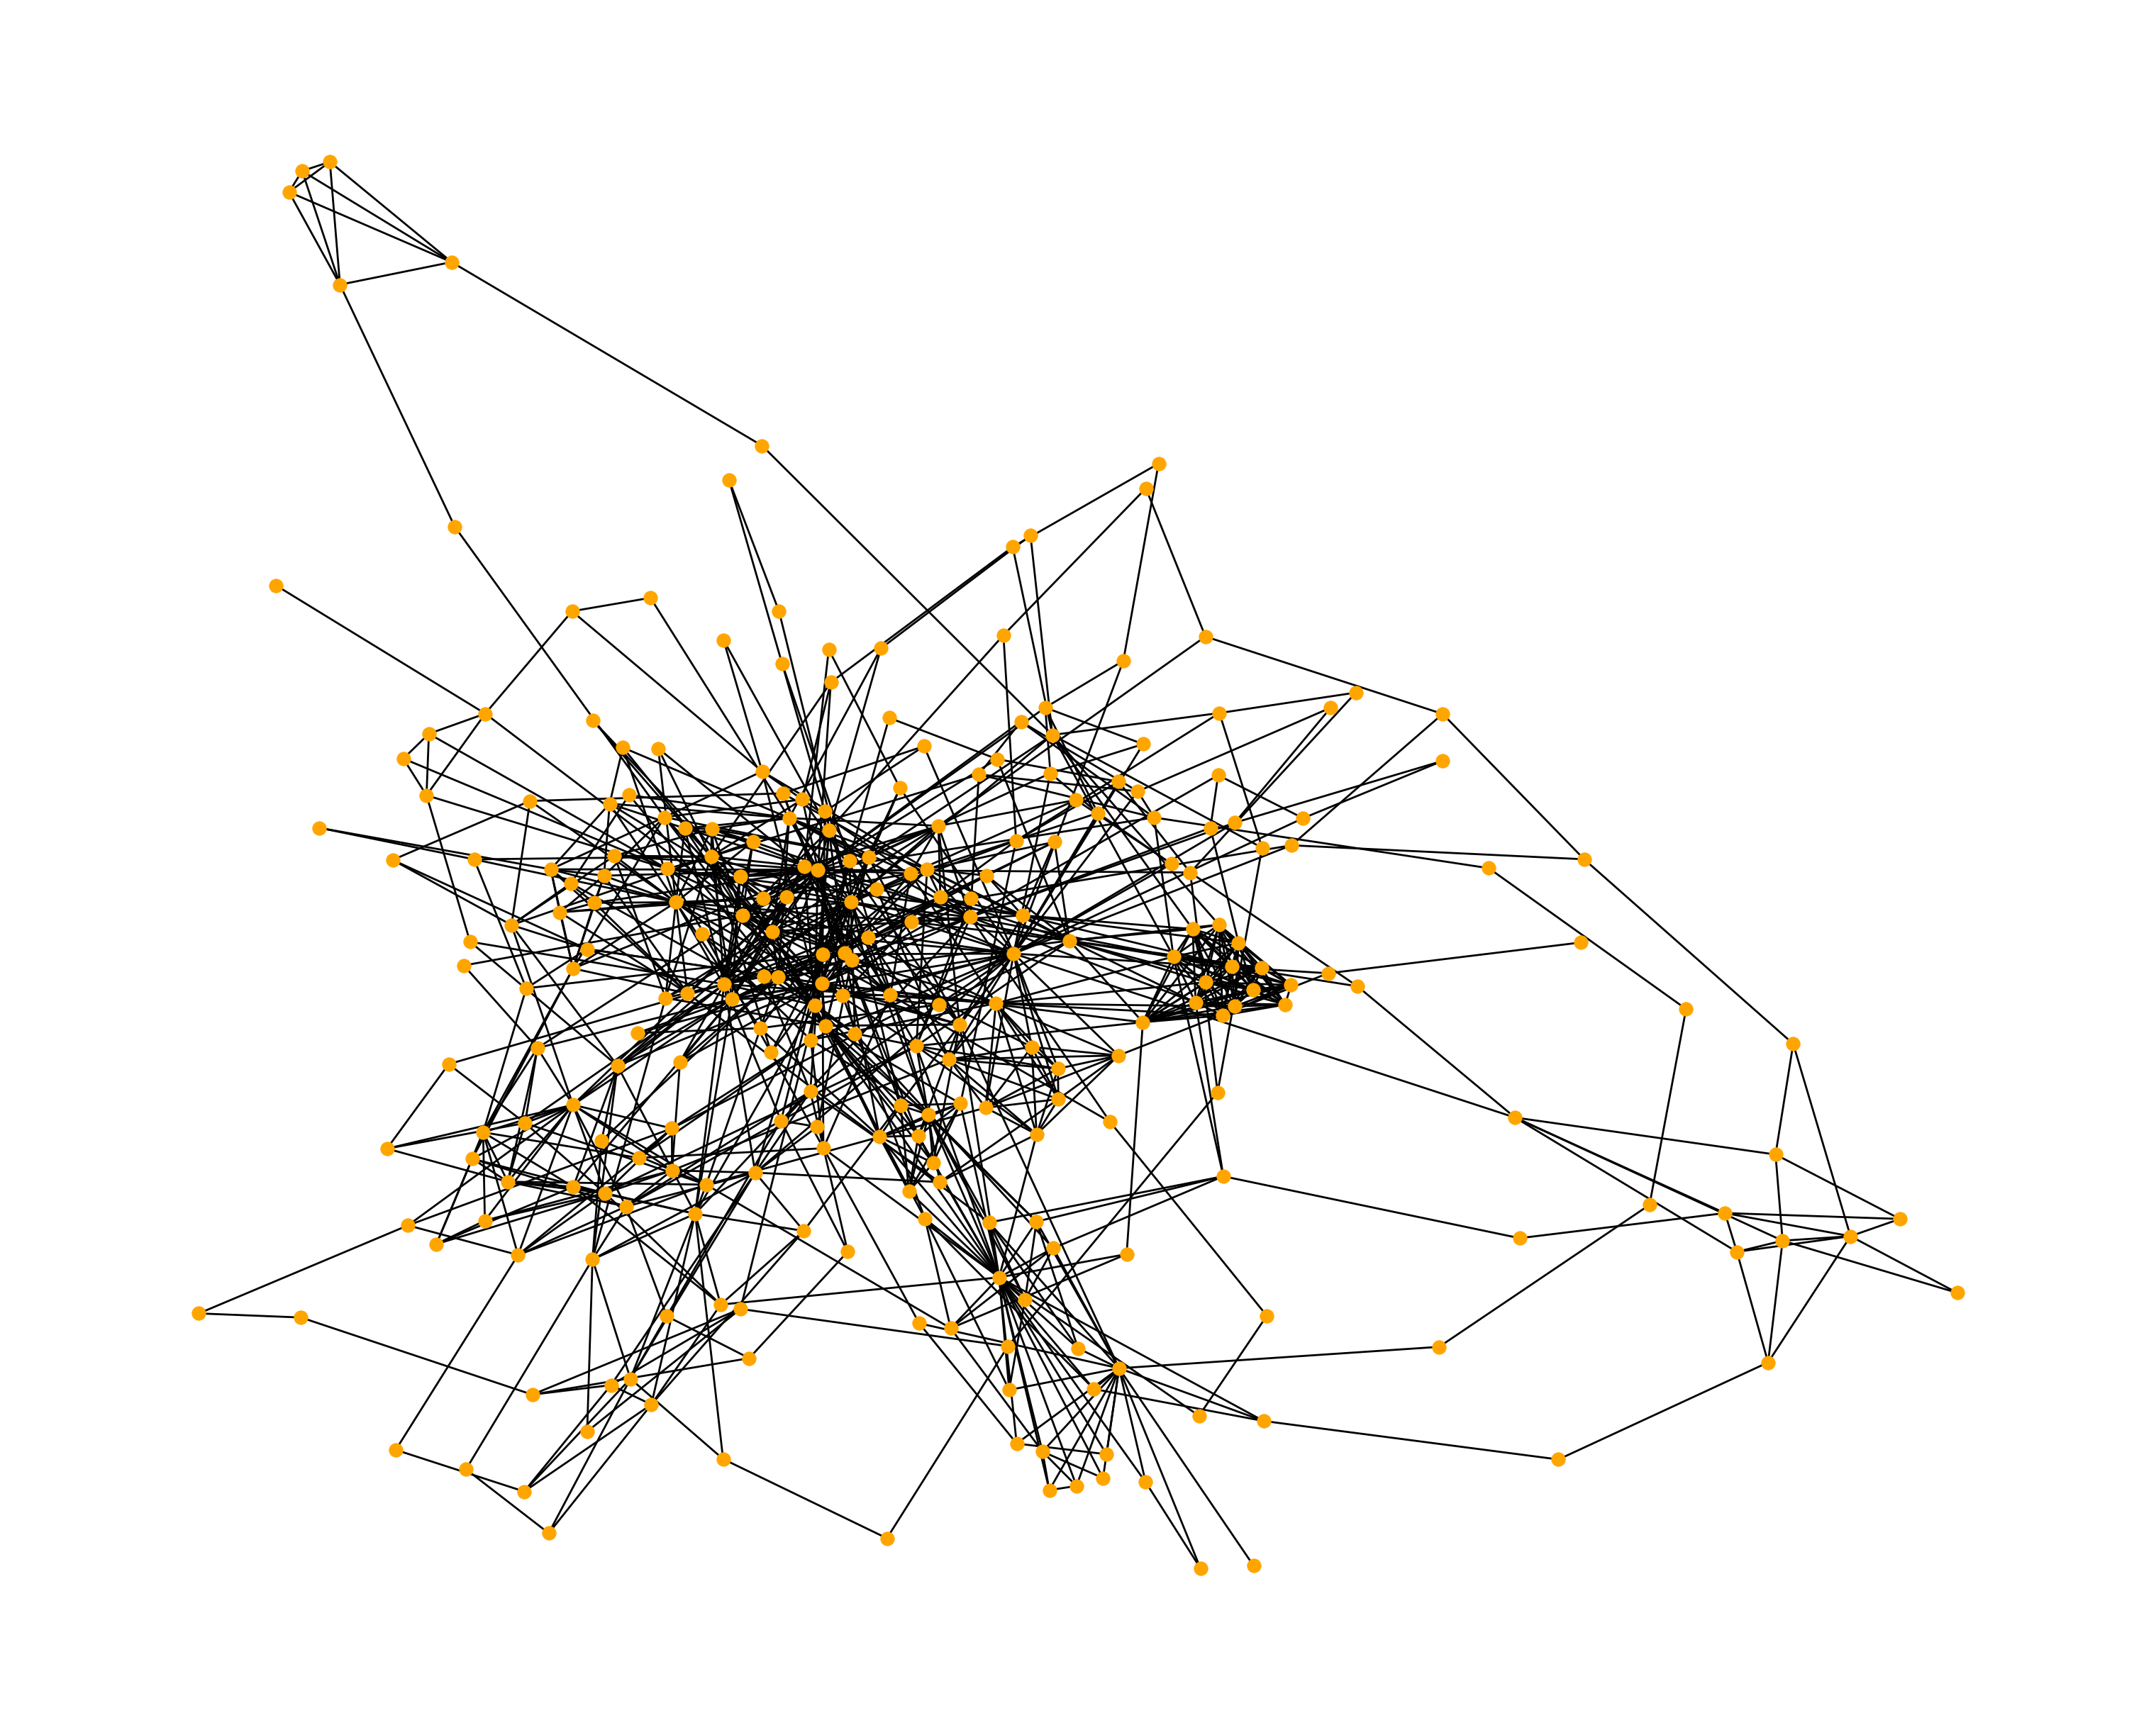

In [165]:
pos = nx.spring_layout(G_sampled)
plt.figure(figsize=(15, 12), dpi=200)
nx.draw(G_sampled, node_color='orange', pos=pos, node_size=50, edge_color='black', linewidths=0.2, font_size=15, )
plt.show()

In [166]:
communities = algorithms.louvain(G_sampled)

In [167]:
len(communities.communities)

10

In [172]:
import community as community_louvain
import matplotlib.cm as cm

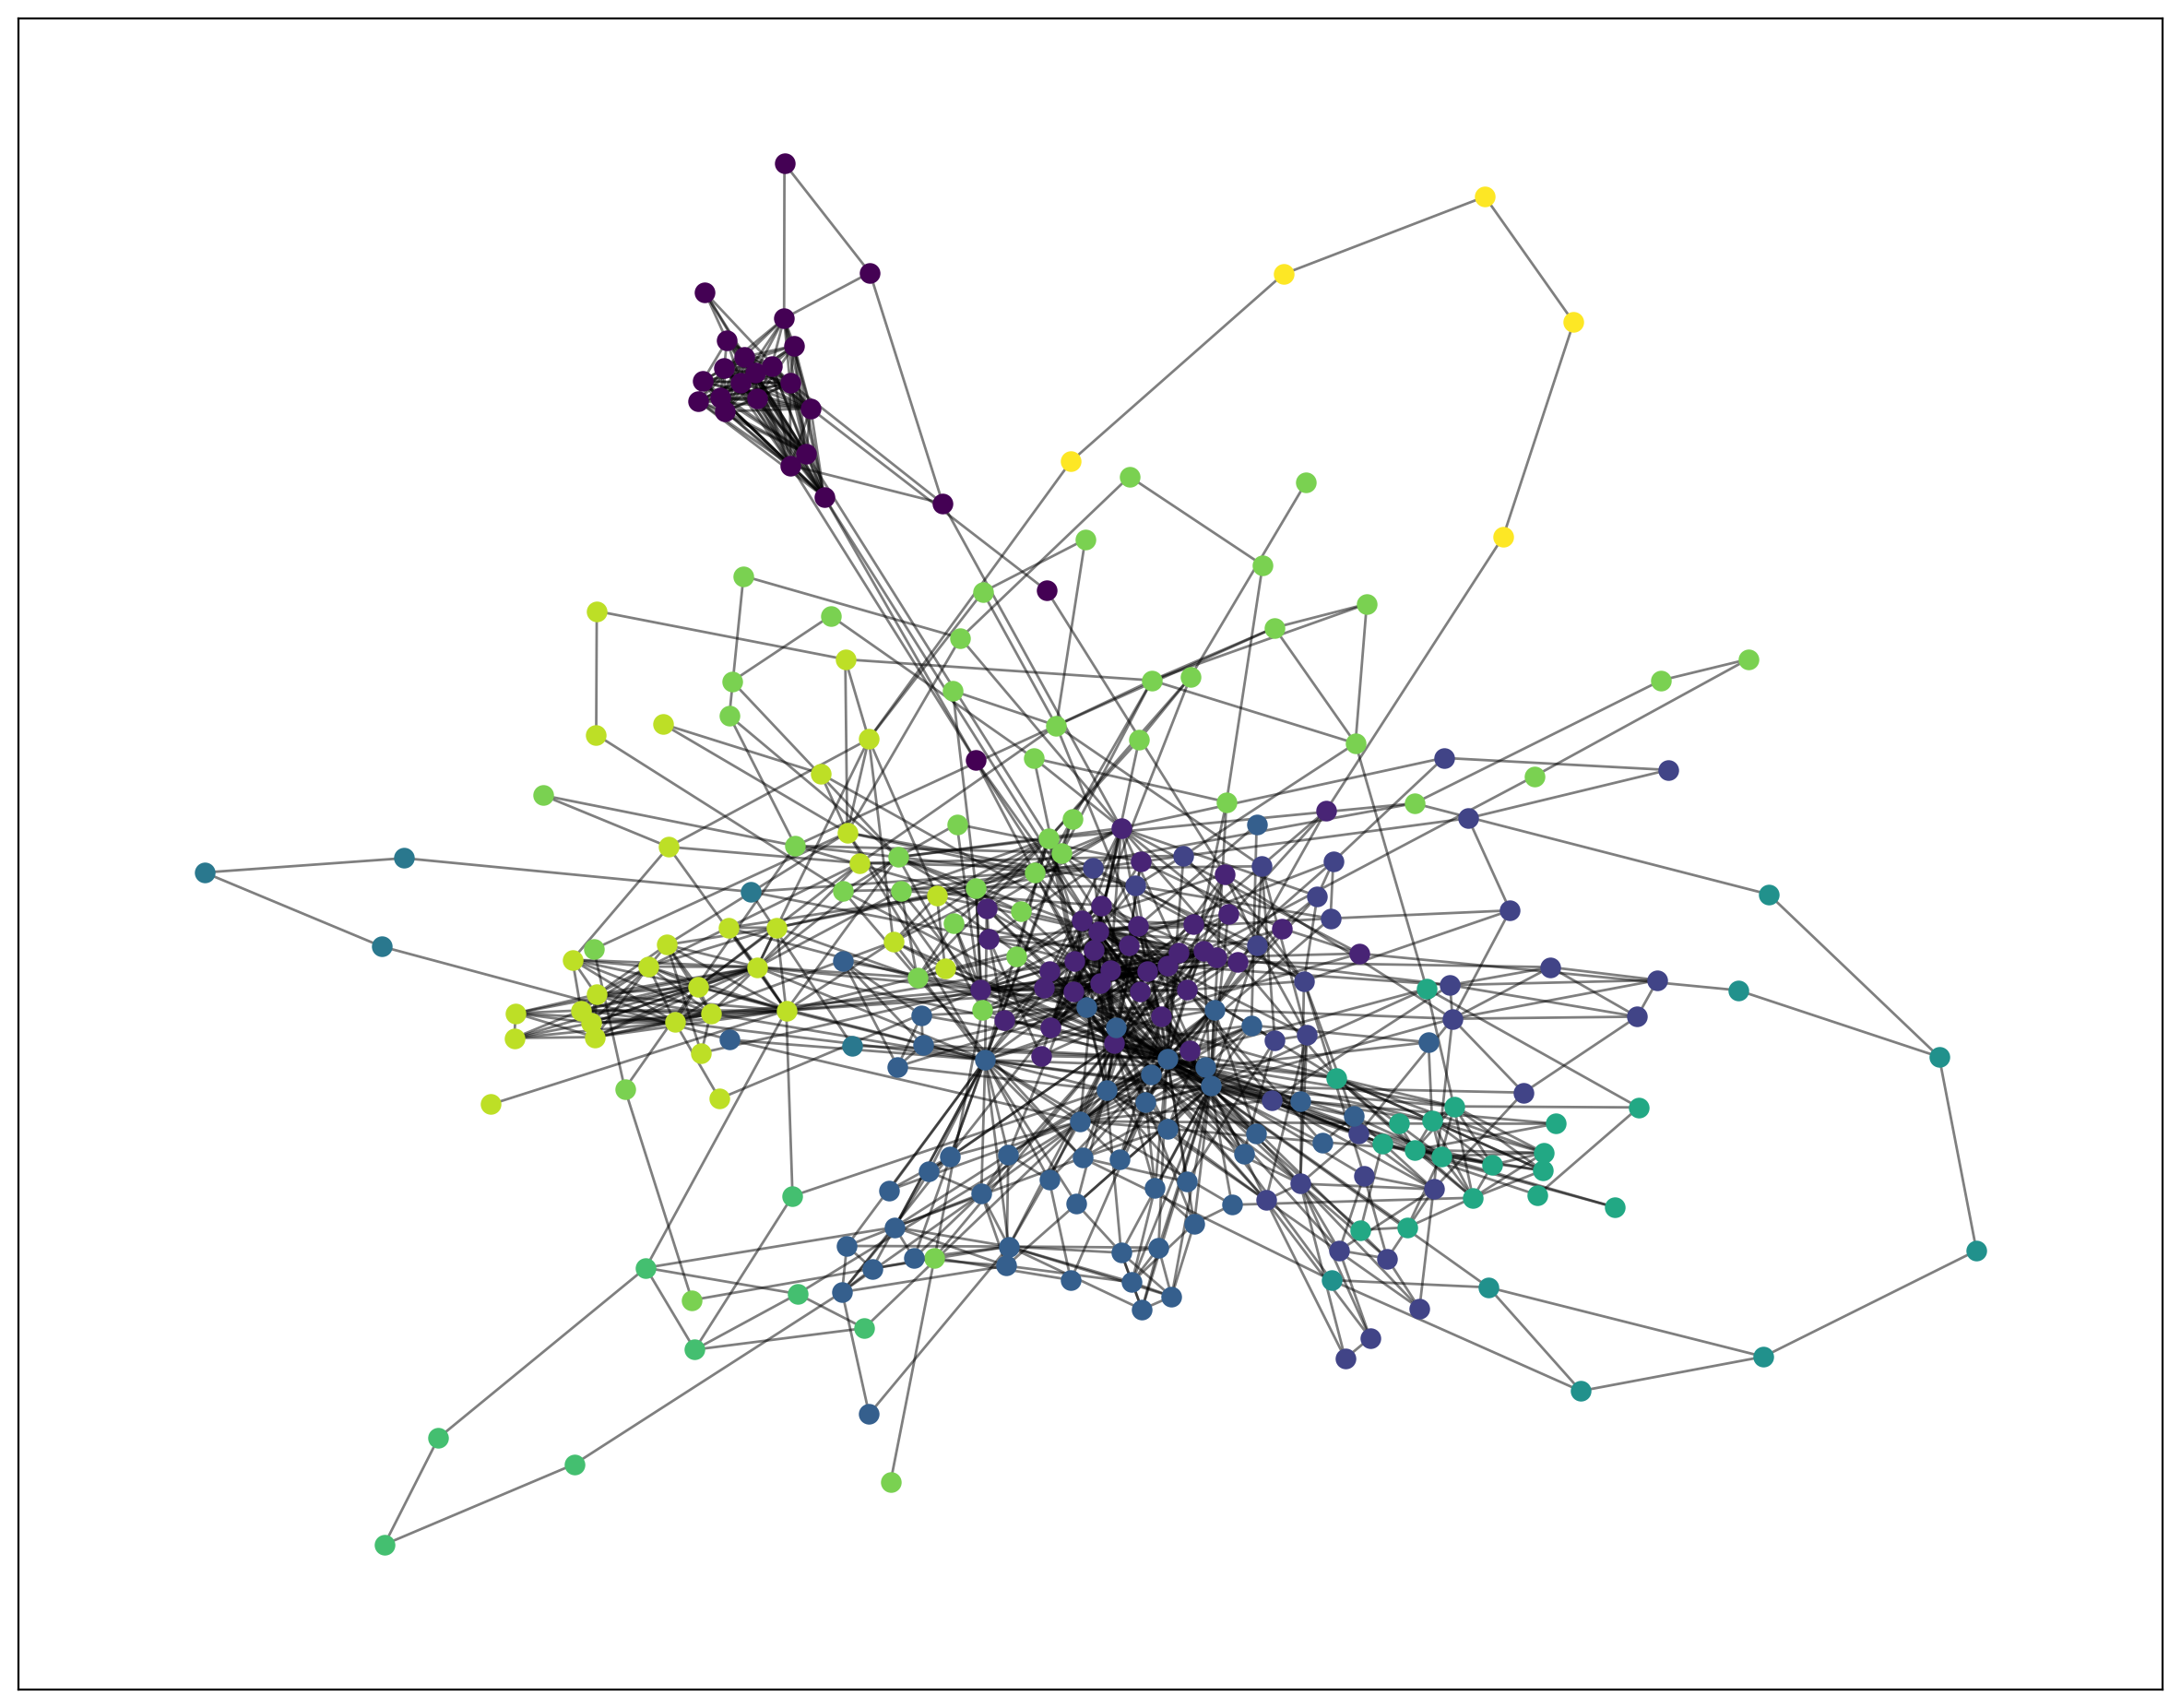

In [173]:
plt.figure(figsize=(15, 12), dpi=200)

# compute the best partition
partition = community_louvain.best_partition(G_sampled)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

# draw the graph
pos = nx.spring_layout(G_sampled)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G_sampled, pos, [node], node_size=50,
                           node_color=[cmap.colors[color]])
plt.show()